In [0]:
#model classifier using convolutionary neural network

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive/HNG-task1/plate_number

/content/drive/My Drive/HNG-task1/plate_number


In [0]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
cd /content/drive/My Drive/HNG-task1

/content/drive/My Drive/HNG-task1


In [0]:
plate_num_dir = './plate_number/'

In [0]:
neg_img_dir = './negative_images/'

In [0]:
plate_images = [plate_num_dir+i for i in os.listdir(plate_num_dir)]
neg_images = [neg_img_dir+i for i in os.listdir(neg_img_dir)]

In [0]:
train_imgs = plate_images[:50]+neg_images[:50]

In [0]:
import random
random.shuffle(train_imgs)  #shuffles the dataset randomly

In [0]:
train_imgs[:10]

['./plate_number/ABC-323AG.jpg',
 './negative_images/4nKnpaPTZh4.jpg',
 './plate_number/GWA 643AJ.jpg',
 './plate_number/P5090219.jpg',
 './negative_images/BFdb2hCgetE.jpg',
 './plate_number/XB398 - RSH.jpg',
 './plate_number/SMK 347AV.jpg',
 './plate_number/AA689-GGE.png',
 './negative_images/KFGgAuZJBGs.jpg',
 './negative_images/Pov9WKor8D8.jpg']

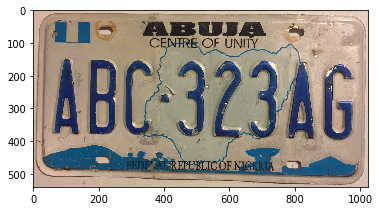

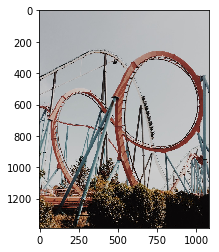

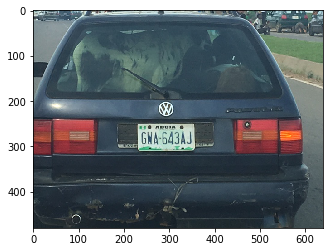

In [0]:
#checking to see that i have the actual images

import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
  img = mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
#declaring image dimensions
nrows = 64
ncolumns = 64
channels = 3 #because they are coloured images


In [0]:
#writing a function to read and process the image to an acceptable format for the model
def read_and_process_images(list_of_images):
  """
  Returns two arrays:
    X is an array of resized images
    Y is an array of labels
  """
  X = [] #initializing empty X list
  Y = [] #initializing empty Y list
  
  for image in list_of_images:
    Img = cv2.imread(image, cv2. IMREAD_COLOR)
    resized_img = cv2.resize(img, (nrows,ncolumns), interpolation = cv2.INTER_CUBIC) #Read the image
    X.append(resized_img)
    #get the labels
    if 'images' in image:
      Y.append(0) #setting 0 for negative images
    else:
      Y.append(1) #setting 1 for plate numbers
  return X,Y

In [0]:
X,Y = read_and_process_images(train_imgs)
# X is now an array of image pixel values while Y is a list of labels

In [0]:
X[0]


array([[[123, 152, 150],
        [229, 248, 247],
        [200, 224, 230],
        ...,
        [212, 238, 237],
        [100,  93,  93],
        [178, 215, 220]],

       [[198, 210, 204],
        [156, 181, 185],
        [103, 124, 129],
        ...,
        [ 81, 113, 105],
        [ 91, 102, 100],
        [ 86, 115, 123]],

       [[ 83,  94,  93],
        [ 71,  85, 103],
        [103, 123, 134],
        ...,
        [ 72, 103,  97],
        [ 76, 100, 110],
        [156, 181, 190]],

       ...,

       [[ 35,  44,  50],
        [ 41,  52,  53],
        [ 39,  48,  53],
        ...,
        [ 65,  79,  80],
        [ 65,  80,  85],
        [ 56,  70,  73]],

       [[ 33,  41,  47],
        [ 30,  38,  46],
        [ 51,  62,  63],
        ...,
        [ 66,  80,  83],
        [ 67,  81,  84],
        [ 68,  82,  85]],

       [[ 32,  41,  48],
        [ 30,  39,  44],
        [ 31,  41,  47],
        ...,
        [ 64,  79,  82],
        [ 64,  78,  81],
        [ 65,  79,  82]]

In [0]:
Y[0:5]

[1, 0, 1, 1, 0]

In [0]:
#converting the list objects to array
X = np.array(X)
Y = np.array(Y)


In [0]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", Y.shape)

Shape of train images is: (100, 64, 64, 3)
Shape of labels is: (100,)


In [0]:
classes = {0: 'random image',
          1: 'license plate'}


In [0]:
def show_images(X, y, idx) :
  image = X[idx]

  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx]]))
  plt.show()

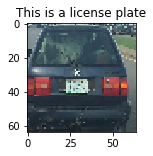

In [0]:
show_images(X, Y, 45)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 2)

print("Shape of train image is:", X_train.shape)
print("Shape of validation image is:", X_val.shape)
print("Shape of labels is:", Y_train.shape)
print("Shape of labels is:", Y_val.shape)

Shape of train image is: (80, 64, 64, 3)
Shape of validation image is: (20, 64, 64, 3)
Shape of labels is: (80,)
Shape of labels is: (20,)


In [0]:
ntrain = len(X_train)
nval = len(X_val)

batch_size = 32

In [0]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.preprocessing.image import img_to_array, load_img


In [0]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), input_shape=(50,50,3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(128, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
activation_26 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_27 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 128)        

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 

In [0]:
train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 
  
val_datagen = ImageDataGenerator(rescale = 1./255)


In [0]:
train_generator = train_datagen.flow(X_train, Y_train, batch_size=batch_size)  
validation_generator = val_datagen.flow(X_val, Y_val, batch_size=batch_size)


In [0]:
history = model.fit_generator(train_generator, 
    steps_per_epoch = ntrain // batch_size, 
    epochs = 64,
    validation_data = validation_generator, 
    validation_steps = nval // batch_size) 
  


Epoch 1/64
2/2 [==============================] - 1s 319ms/step - loss: 0.9026 - acc: 0.5278 - val_loss: 0.6796 - val_acc: 0.6000
Epoch 2/64
2/2 [==============================] - 0s 57ms/step - loss: 0.7199 - acc: 0.4375 - val_loss: 0.7144 - val_acc: 0.4000
Epoch 3/64
2/2 [==============================] - 0s 30ms/step - loss: 0.7096 - acc: 0.3924 - val_loss: 0.6964 - val_acc: 0.4000
Epoch 4/64
2/2 [==============================] - 0s 47ms/step - loss: 0.6920 - acc: 0.5000 - val_loss: 0.7005 - val_acc: 0.4000
Epoch 5/64
2/2 [==============================] - 0s 78ms/step - loss: 0.6925 - acc: 0.4653 - val_loss: 0.6971 - val_acc: 0.4000
Epoch 6/64
2/2 [==============================] - 0s 31ms/step - loss: 0.6981 - acc: 0.4618 - val_loss: 0.6886 - val_acc: 0.6000
Epoch 7/64
2/2 [==============================] - 0s 77ms/step - loss: 0.6971 - acc: 0.5174 - val_loss: 0.6948 - val_acc: 0.4000
Epoch 8/64
2/2 [==============================] - 0s 86ms/step - loss: 0.6929 - acc: 0.5156 - va

In [0]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')